In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from datetime import date, timedelta
import networkx as nx
import pickle
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [2]:
with open('fifa_processed.pkl', 'rb') as f:
    fifa1 = pickle.load(f)

In [3]:
#with open('predictors_processed.pkl', 'rb') as f:
#    predictors_df = pickle.load(f)

In [3]:
fifa1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Attack_WR,Defense_WR,Position_Group,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Continent
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,0,5.0,4.0,4.0,Lean,1,RF,10.0,5297,0,3,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2.242424,Medium,Medium,Forward,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,South America
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,1,5.0,4.0,5.0,Normal,1,ST,7.0,175,0,4,188,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2.520000,High,Low,Forward,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,Europe
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,1,5.0,5.0,5.0,Lean,1,LW,10.0,516,0,4,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2.233333,High,Medium,Forward,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,South America
3,3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,1,4.0,3.0,1.0,Lean,1,GK,1.0,2741,0,2,193,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2.090909,Medium,Medium,GoalKeeper,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,Europe
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,1,4.0,5.0,4.0,Normal,1,RCM,7.0,1220,0,5,180,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2.090909,High,High,Midfielder,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,Europe


In [4]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [5]:
pcount_by_country = pd.DataFrame(fifa1.groupby(['Nationality'])['Name'].count().reset_index())

mapping = [go.Choropleth(
            colorscale = 'YlOrRd',
            locationmode = 'country names',
            locations = pcount_by_country['Nationality'],
            text = pcount_by_country['Nationality'],
            z = pcount_by_country['Name'])]

layout = go.Layout(title = 'Player count by country')

fig = go.Figure(data = mapping, layout = layout)
py.iplot(fig)

# Adding clubs back to 'Loaned From' column

In [4]:
git_url = 'https://raw.githubusercontent.com/nazihkalo/FIFA19-Scouting-Analysis/master/FIFA19_data.csv'
fifa = pd.read_csv(git_url)
country_url = 'https://raw.githubusercontent.com/nazihkalo/FIFA19-Scouting-Analysis/master/coun_by_cont.csv'
countries_cont = pd.read_csv(country_url)

In [5]:
fifa['Club'] = fifa['Club'].fillna('No_Club')

In [6]:
fifa.dropna(subset=['Body Type'], inplace = True)

In [7]:
fifa = fifa.merge(countries_cont, how = 'left', left_on = 'Nationality', right_on = 'Country')
fifa = fifa.drop('Country', axis = 1)

In [8]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Continent
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,South America
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,Europe
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,South America
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,Europe
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,Europe


# Additional analysis using Graph

### All clubs

In [9]:
ClubLoan1 = nx.from_pandas_edgelist(fifa, source='Loaned From', target='Club', edge_attr=True)

In [10]:
ClubLoan1.nodes()

NodeView((nan, 'FC Barcelona', 'Juventus', 'Paris Saint-Germain', 'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid', 'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur', 'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio', 'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma', 'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto', 'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP', 'Real Betis', 'Olympique de Marseille', 'RC Celta', 'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF', 'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco', 'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro', 'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton', 'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim', 'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr', 'Wolverhampton Wanderers', 'Borussia Mönchengladbach', 'Hertha BSC', 'SV Werder Bremen', 'Cruzeiro', 'Athletic Club de Bilbao', 'Torino', 'Medipol Başakşehir FK', 'Beijing Sino

In [11]:
ClubLoan1.edges()

EdgeView([(nan, 'FC Barcelona'), (nan, 'Juventus'), (nan, 'Paris Saint-Germain'), (nan, 'Manchester United'), (nan, 'Manchester City'), (nan, 'Chelsea'), (nan, 'Real Madrid'), (nan, 'Atlético Madrid'), (nan, 'FC Bayern München'), (nan, 'Tottenham Hotspur'), (nan, 'Liverpool'), (nan, 'Napoli'), (nan, 'Arsenal'), (nan, 'Inter'), (nan, 'Lazio'), (nan, 'Borussia Dortmund'), (nan, 'Vissel Kobe'), (nan, 'Olympique Lyonnais'), (nan, 'Roma'), (nan, 'Valencia CF'), (nan, 'FC Porto'), (nan, 'FC Schalke 04'), (nan, 'Beşiktaş JK'), (nan, 'LA Galaxy'), (nan, 'Sporting CP'), (nan, 'Real Betis'), (nan, 'Olympique de Marseille'), (nan, 'RC Celta'), (nan, 'Bayer 04 Leverkusen'), (nan, 'Real Sociedad'), (nan, 'Villarreal CF'), (nan, 'Sevilla FC'), (nan, 'SL Benfica'), (nan, 'AS Saint-Étienne'), (nan, 'AS Monaco'), (nan, 'Leicester City'), (nan, 'Atalanta'), (nan, 'Grêmio'), (nan, 'Atlético Mineiro'), (nan, 'RB Leipzig'), (nan, 'Ajax'), (nan, 'Dalian YiFang FC'), (nan, 'Everton'), (nan, 'Milan'), (nan, '

C:\Users\woojo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\woojo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


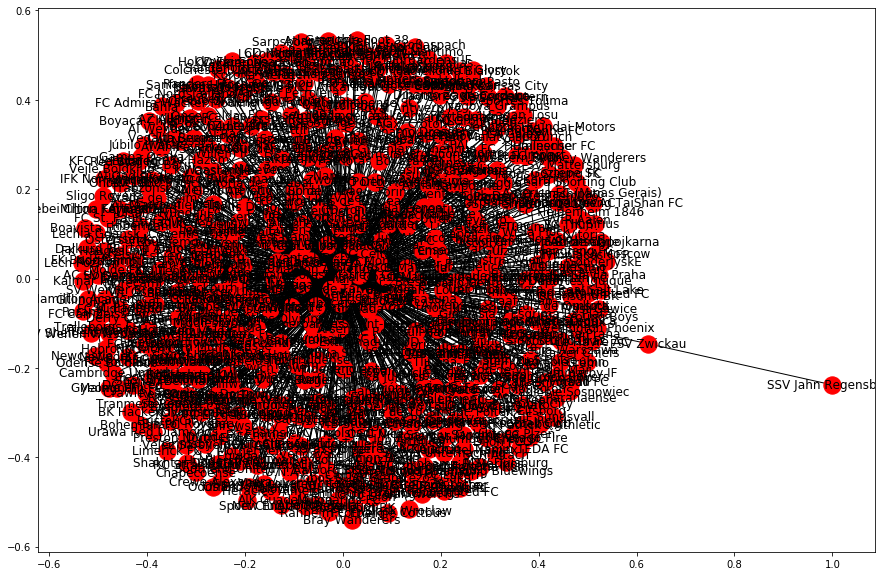

In [12]:
plt.figure(figsize=(15,10))
nx.draw_networkx(ClubLoan1, with_labels=True)

### Only 'Loan From != NaN' rows

In [13]:
fifa_loanfrom = fifa.dropna(subset=['Loaned From'])

In [14]:
fifa_loanfrom.shape

(1264, 90)

In [15]:
ClubLoan2 = nx.from_pandas_edgelist(fifa_loanfrom, source='Loaned From', target='Club', edge_attr=True)

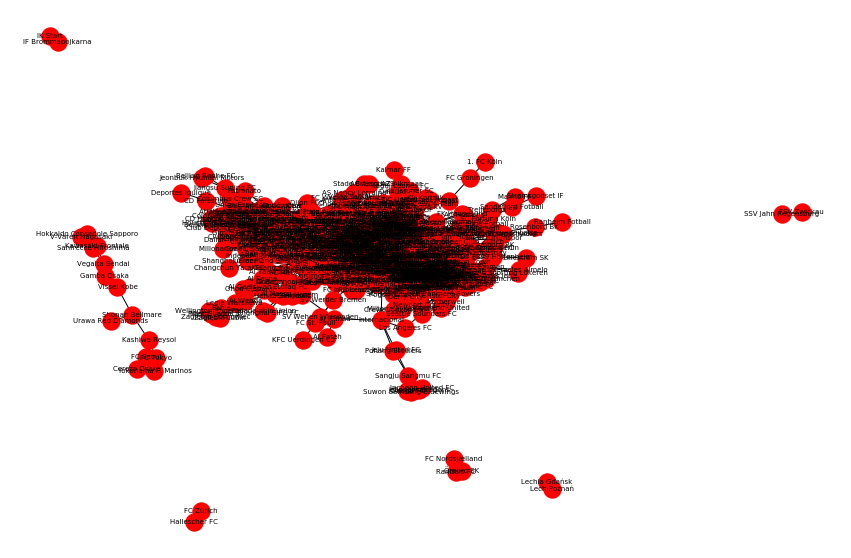

In [16]:
plt.figure(figsize=(15,10))
nx.draw_networkx(ClubLoan2, with_labels=True, font_size=7)
plt.axis('off')
plt.show()

### Only selecting clubs that loaned out 10 or more players

In [17]:
Loaned_From_Count = pd.DataFrame(fifa.groupby(fifa['Loaned From'])['Loaned From'].count().sort_values(ascending=False))
LFC_10 = Loaned_From_Count[Loaned_From_Count['Loaned From'] > 9]
LFC_10_list = list(LFC_10.index)
LFC_10_Clubs = fifa.loc[fifa['Loaned From'].isin(LFC_10_list)]
LFC_10_list

['Atalanta',
 'Sassuolo',
 'Juventus',
 'SL Benfica',
 'Sporting CP',
 'Liverpool',
 'Manchester City',
 'Leeds United',
 'Udinese',
 'AS Monaco',
 'Chelsea',
 'Inter',
 'Napoli',
 'Watford',
 'Villarreal CF',
 'FC Red Bull Salzburg',
 'Real Madrid',
 'Racing Club',
 'Wolverhampton Wanderers',
 'Sheffield United',
 'Genoa',
 'Aston Villa',
 'Brighton & Hove Albion',
 'Roma',
 'Atlético Madrid',
 'FC Porto',
 'Everton']

In [18]:
ClubLoan3 = nx.from_pandas_edgelist(LFC_10_Clubs, source='Loaned From', target='Club', edge_attr=True)

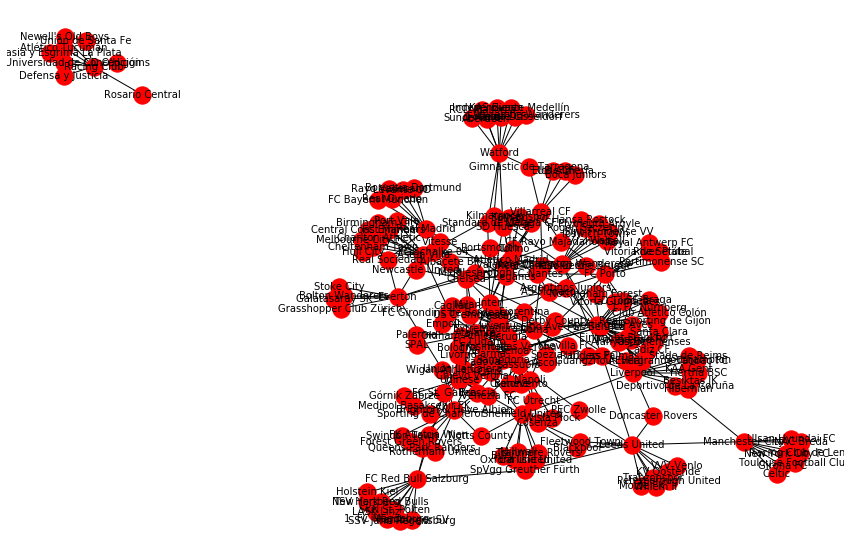

In [19]:
plt.figure(figsize=(15,10))
nx.draw_networkx(ClubLoan3, with_labels=True, font_size=10)
plt.axis('off')
plt.show()

### Only selecting clubs that loaned out 15 or more players

In [20]:
LFC_15 = Loaned_From_Count[Loaned_From_Count['Loaned From'] > 14]
LFC_15_list = list(LFC_15.index)
LFC_15_Clubs = fifa.loc[fifa['Loaned From'].isin(LFC_15_list)]
LFC_15_list

['Atalanta', 'Sassuolo', 'Juventus', 'SL Benfica']

In [21]:
LFC_15_Clubs.loc[:,['Club','Loaned From']]

,Club,Loaned From
38,Milan,Juventus
166,Guangzhou Evergrande Taobao FC,SL Benfica
332,Inter,Sassuolo
562,Milan,Atalanta
732,Eintracht Frankfurt,SL Benfica
779,Frosinone,Atalanta
809,Roma,Atalanta
823,Wolverhampton Wanderers,SL Benfica
832,Al Hilal,SL Benfica
901,Genoa,SL Benfica


In [22]:
ClubLoan4 = nx.from_pandas_edgelist(LFC_15_Clubs, source='Loaned From', target='Club', edge_attr=True)

In [23]:
ClubLoan4.nodes()

NodeView(('Juventus', 'Milan', 'SL Benfica', 'Guangzhou Evergrande Taobao FC', 'Sassuolo', 'Inter', 'Atalanta', 'Eintracht Frankfurt', 'Frosinone', 'Roma', 'Wolverhampton Wanderers', 'Al Hilal', 'Genoa', 'SPAL', 'Fiorentina', 'Sporting CP', 'FC Girondins de Bordeaux', 'Hellas Verona', 'Bologna', 'Sampdoria', 'Cagliari', 'Benevento', 'Rio Ave FC', 'Alanyaspor', 'FC Utrecht', 'Nottingham Forest', 'Moreirense FC', 'Udinese', 'Vitória Guimarães', 'Cádiz CF', 'Argentinos Juniors', 'Pescara', 'CD Tondela', 'US Cremonese', 'Santa Clara', 'Perugia', 'CD Aves', 'Venezia FC', 'Padova', 'Livorno', 'Carpi', 'Os Belenenses', 'Palermo', 'Empoli', 'Crotone', 'PEC Zwolle', 'Ascoli', 'Valencia CF', 'Spezia', 'FC Lugano'))

In [24]:
ClubLoan4.edges()

EdgeView([('Juventus', 'Milan'), ('Juventus', 'Fiorentina'), ('Juventus', 'Sporting CP'), ('Juventus', 'Sampdoria'), ('Juventus', 'Bologna'), ('Juventus', 'Hellas Verona'), ('Juventus', 'Cagliari'), ('Juventus', 'Sassuolo'), ('Juventus', 'Pescara'), ('Juventus', 'Genoa'), ('Juventus', 'Padova'), ('Juventus', 'US Cremonese'), ('Juventus', 'Empoli'), ('Juventus', 'Valencia CF'), ('Juventus', 'FC Lugano'), ('Milan', 'Atalanta'), ('SL Benfica', 'Guangzhou Evergrande Taobao FC'), ('SL Benfica', 'Eintracht Frankfurt'), ('SL Benfica', 'Wolverhampton Wanderers'), ('SL Benfica', 'Al Hilal'), ('SL Benfica', 'Genoa'), ('SL Benfica', 'Alanyaspor'), ('SL Benfica', 'Nottingham Forest'), ('SL Benfica', 'Moreirense FC'), ('SL Benfica', 'Vitória Guimarães'), ('SL Benfica', 'Cádiz CF'), ('SL Benfica', 'Argentinos Juniors'), ('SL Benfica', 'CD Tondela'), ('SL Benfica', 'Hellas Verona'), ('SL Benfica', 'Santa Clara'), ('SL Benfica', 'CD Aves'), ('SL Benfica', 'Os Belenenses'), ('Sassuolo', 'Inter'), ('Sas

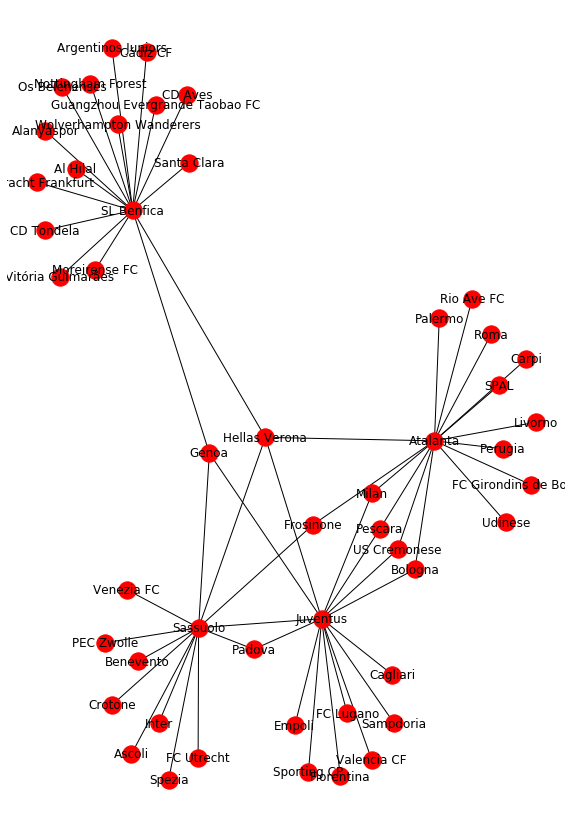

In [25]:
plt.figure(figsize=(10,15))
nx.draw_networkx(ClubLoan4, with_labels=True)
plt.axis('off')
plt.show()

In [26]:
print(nx.degree(ClubLoan4, 'Atalanta'))
print(nx.degree(ClubLoan4, 'Juventus'))
print(nx.degree(ClubLoan4, 'Sassuolo'))
print(nx.degree(ClubLoan4, 'SL Benfica'))

15
15
13
16


In [27]:
nx.average_clustering(ClubLoan4)

0.03134065934065934

In [28]:
print(nx.shortest_path(ClubLoan4, 'Atalanta', 'Al Hilal'))
print(nx.shortest_path_length(ClubLoan4, 'Atalanta', 'Al Hilal'))

['Atalanta', 'Hellas Verona', 'SL Benfica', 'Al Hilal']
3


C:\Users\woojo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


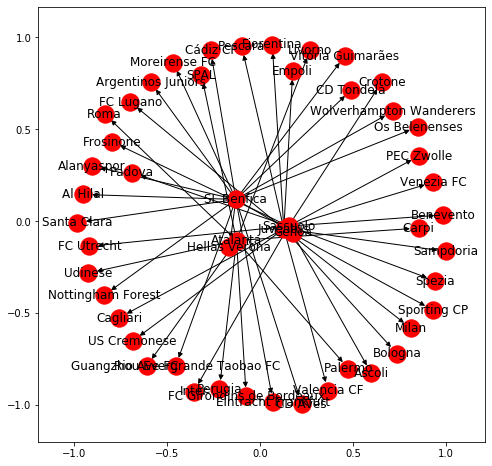

In [29]:
plt.figure(figsize=(8,8))
T = nx.bfs_tree(ClubLoan4, 'SL Benfica')
nx.draw_networkx(T)

In [30]:
nx.eccentricity(ClubLoan4, LFC_15_list)
# The eccentricity of a node v is the maximum distance from v to all other nodes in G.

{'Atalanta': 3, 'Sassuolo': 3, 'Juventus': 3, 'SL Benfica': 3}

In [31]:
nx.degree_centrality(ClubLoan4)

{'Juventus': 0.3061224489795918,
 'Milan': 0.04081632653061224,
 'SL Benfica': 0.32653061224489793,
 'Guangzhou Evergrande Taobao FC': 0.02040816326530612,
 'Sassuolo': 0.26530612244897955,
 'Inter': 0.02040816326530612,
 'Atalanta': 0.3061224489795918,
 'Eintracht Frankfurt': 0.02040816326530612,
 'Frosinone': 0.04081632653061224,
 'Roma': 0.02040816326530612,
 'Wolverhampton Wanderers': 0.02040816326530612,
 'Al Hilal': 0.02040816326530612,
 'Genoa': 0.061224489795918366,
 'SPAL': 0.02040816326530612,
 'Fiorentina': 0.02040816326530612,
 'Sporting CP': 0.02040816326530612,
 'FC Girondins de Bordeaux': 0.02040816326530612,
 'Hellas Verona': 0.08163265306122448,
 'Bologna': 0.04081632653061224,
 'Sampdoria': 0.02040816326530612,
 'Cagliari': 0.02040816326530612,
 'Benevento': 0.02040816326530612,
 'Rio Ave FC': 0.02040816326530612,
 'Alanyaspor': 0.02040816326530612,
 'FC Utrecht': 0.02040816326530612,
 'Nottingham Forest': 0.02040816326530612,
 'Moreirense FC': 0.02040816326530612,
 '

## Back to all All Clubs

In [32]:
import operator
# The degree centrality for a node v is the fraction of nodes it is connected to.
sorted_result_dc = sorted(nx.degree_centrality(ClubLoan1).items(), key=operator.itemgetter(1), reverse=True)
sorted_result_dc
# Sorted in descending order of clubs most active in loaning (In/Out) business.

[(nan, 0.998468606431853),
 ('Atalanta', 0.02909647779479326),
 ('SL Benfica', 0.02756508422664625),
 ('Sporting CP', 0.026033690658499236),
 ('Genoa', 0.026033690658499236),
 ('Aston Villa', 0.026033690658499236),
 ('Juventus', 0.02450229709035222),
 ('Sassuolo', 0.02450229709035222),
 ('Sampdoria', 0.02450229709035222),
 ('Inter', 0.022970903522205207),
 ('Fulham', 0.022970903522205207),
 ('Nottingham Forest', 0.022970903522205207),
 ('Sheffield United', 0.022970903522205207),
 ('Wolverhampton Wanderers', 0.021439509954058193),
 ('Leeds United', 0.021439509954058193),
 ('Hellas Verona', 0.021439509954058193),
 ('Chelsea', 0.01990811638591118),
 ('FC Porto', 0.01990811638591118),
 ('Watford', 0.01990811638591118),
 ('Udinese', 0.01990811638591118),
 ('Málaga CF', 0.01990811638591118),
 ('Rangers FC', 0.01990811638591118),
 ('SD Huesca', 0.01990811638591118),
 ('Liverpool', 0.018376722817764167),
 ('Villarreal CF', 0.018376722817764167),
 ('FC Red Bull Salzburg', 0.018376722817764167),

In [33]:
# Interesting observations --> 'Sangju Sangmu FC', 0.01225114854517611

# Sangmu's playing staff is made up of young South Korean professional footballers serving
# their "compulsory two-year military duty". Fifteen players join up (as loaned players) at the start
# of every season and spend two years with the side before returning to their previous professional
# club. This explains why Sangju has relatively hire degree centrality, but not as high as some of
# the other clubs because they can only loan (in) players, and not loan out.

nx.degree(ClubLoan1, 'Sangju Sangmu FC')

8

In [34]:
sorted_result_ec = sorted(nx.betweenness_centrality(ClubLoan1).items(), key=operator.itemgetter(1), reverse=True)
sorted_result_ec

[(nan, 0.9837032150615516),
 ('FSV Zwickau', 0.0030627871362940273),
 ('SL Benfica', 0.00028811494533645247),
 ('Aston Villa', 0.0002654102349702646),
 ('Sporting CP', 0.0002458372087925165),
 ('Atalanta', 0.00024541219450979973),
 ('Genoa', 0.00021446071578072061),
 ('Nottingham Forest', 0.00019925340648947593),
 ('Fulham', 0.00019729610387170113),
 ('Sassuolo', 0.00018790105130638205),
 ('Sheffield United', 0.00017968038031172784),
 ('Inter', 0.00017850599874106291),
 ('Leeds United', 0.00017733161717039807),
 ('Wolverhampton Wanderers', 0.00017302555141129346),
 ('Juventus', 0.00016289231614441356),
 ('Watford', 0.00014812866211319785),
 ('Rangers FC', 0.000146797696333111),
 ('FC Porto', 0.00014366601214467126),
 ('Málaga CF', 0.0001434311358305383),
 ('Chelsea', 0.00014014286743267663),
 ('Sampdoria', 0.0001394941614222141),
 ('SD Huesca', 0.00013481900431232914),
 ('FC Red Bull Salzburg', 0.00012526736753758802),
 ('Liverpool', 0.00012424957017634513),
 ('Udinese', 0.000113176829